# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [2]:
 from Scripts import helperfn as hf
 from sklearn.cluster import KMeans
 import numpy as np
 import matplotlib.pyplot as plt


In [48]:
X = hf.get_data_noresults()

Y = hf.get_results(0)
X, Y =hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

In [57]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=2, max_iter=3).fit(X)
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

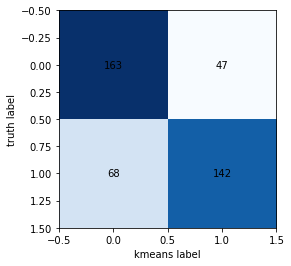

In [58]:
from sklearn.metrics import confusion_matrix

# kmeans - predicted class
# Y - actual class

cm = confusion_matrix(Y, kmeans.labels_)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [68]:
N = 1
(unique, counts) = np.unique(kmeans.labels_, return_counts=True)
(unique, actualCount) = np.unique(Y, return_counts=True)
# actualCount = np.sum(Y == 0)


In [40]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({0: 5939, 1: 3751})


In [67]:
print("Number of actual 20 signs: ", np.sum(Y == 0))
print("Number of 20 signs according to cluser: ", np.unique(kmeans.labels_, return_counts=True))

Number of actual 20 signs:  0    210
dtype: int64
Number of 20 signs according to cluser:  (array([0, 1]), array([5939, 3751], dtype=int64))
